In [11]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math


In [12]:
#Question 1: 

tf = 1 #final time as we want to end with y(1)
dt = 0.01 #time step
N  = int(tf/dt) #no of time steps

y_e  = np.zeros(N+1) #solution vector for euler explicit
y_i  = [] #solution vector for euler implicit
y_t  = [] #solution vector for trapezoidal rule
y_rk2 = [] #solution vector for RK2 method
y_rk4 = [] #solution vector for RK4 method
t  = np.zeros(N+1) #time stamps
y_e[0] = 0.5 #initial value given
y_i.append(0.5)
y_t.append(0.5)
y_rk2.append(0.5)
y_rk4.append(0.5)

for i in range(N):
    y_e[i+1] = y_e[i] + dt*(y_e[i]-1)*(y_e[i]) # update step for euler explicit
    y_i.append(((1+dt) - cmath.sqrt((1+dt)**2 - 4*(y_i[i])*dt))/(2*dt)) #update for euler implicit
    y_t.append(((1+(dt/2)) - cmath.sqrt((1+(dt/2))**2 - 4*(dt/2)*((dt/2)*y_t[i]**2 + (1-(dt/2))*y_t[i])))/dt)
    
    #RK-2 with alpha = 0.5
    k_1 = dt*(y_rk2[i]-1)*(y_rk2[i]) #first intermediate point
    k_2 = dt*(y_rk2[i]-1 + 0.5*k_1)*(y_rk2[i]+0.5*k_1) #second intermediate point
    y_rk2.append(y_rk2[i] + k_2) #update
    
    
    #RK-4 
    k_1 = dt*(y_rk4[i]-1)*(y_rk4[i]) #first intermediate point
    k_2 = dt*(y_rk4[i]-1 + 0.5*k_1)*(y_rk4[i]+0.5*k_1) #second intermediate point
    k_3 = dt*(y_rk4[i]-1 + 0.5*k_2)*(y_rk4[i]+0.5*k_2) #third intermediate point
    k_4 = dt*(y_rk4[i]-1 + k_3)*(y_rk4[i]+k_3) #fourth intermediate point
    y_rk4.append(y_rk4[i] + (1/6)*k_1 + (1/3)*(k_2+k_3)+(1/6)*k_4) #update
    
    t[i+1] = t[i] + dt
    
y_true = [(1/(1+math.e**t_i)) for t_i in t] #the actual solution to the differential equation
print(f"Actual value y(1) : {y_true[-1]}")
print(f"Euler explicit estimate y(1) : {y_e[-1]}")
print(f"Euler implicit estimate y(1) : {y_i[-1].real}")
print(f"Trapezoidal Rule estimate y(1) : {y_t[-1].real}")
print(f"Second Order Runge Kutta estimate y(1) : {y_rk2[-1]}")
print(f"Fourth Order Runge Kutta estimate y(1) : {y_rk4[-1]}")
    
    

Actual value y(1) : 0.268941421369995
Euler explicit estimate y(1) : 0.2687054165811632
Euler implicit estimate y(1) : 0.26917773195118677
Trapezoidal Rule estimate y(1) : 0.2689420543813492
Second Order Runge Kutta estimate y(1) : 0.2689412904060045
Fourth Order Runge Kutta estimate y(1) : 0.26894142137184596


C:\Users\ABHISHEK\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ABHISHEK\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


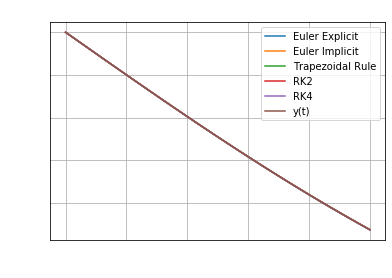

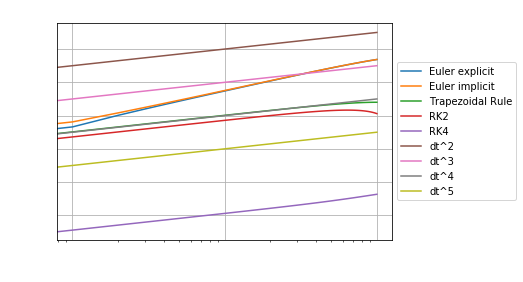

In [13]:
#Actual plot of the function

plt.plot(t,y_e,label = 'Euler Explicit')
plt.plot(t,y_i,label = 'Euler Implicit')
plt.plot(t,y_t,label = 'Trapezoidal Rule')
plt.plot(t,y_rk2,label = 'RK2')
plt.plot(t,y_rk4,label = 'RK4')
plt.plot(t,y_true,label = 'y(t)')
plt.grid()
plt.legend()
plt.xlabel('<-t->',color = 'white')
plt.ylabel('y(t)',color = 'white')
plt.title('y(t) estimated using different methods',color = 'white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

#Compiling absolute errors
err_e = abs(y_true - y_e)
err_i = abs(np.asarray(y_true) - np.asarray(y_i))
err_t = abs(np.asarray(y_true) - np.asarray(y_t))
err_rk2 = abs(np.asarray(y_true) - np.asarray(y_rk2))
err_rk4 = abs(np.asarray(y_true) - np.asarray(y_rk4))

#plotting the absolute errors in a loglog plot
plt.loglog(t,err_e,label = 'Euler explicit')
plt.loglog(t,err_i,label = 'Euler implicit')
plt.loglog(t,err_t,label = 'Trapezoidal Rule')
plt.loglog(t,err_rk2,label = 'RK2')
plt.loglog(t,err_rk4,label = 'RK4')

#plotting the orders
dt_2 = [i*dt**2 for i in range(len(t))] #dt^2
dt_3 = [i*dt**3 for i in range(len(t))] #dt^3
dt_4 = [i*dt**4 for i in range(len(t))] #dt^4
dt_5 = [i*dt**5 for i in range(len(t))] #dt^5

plt.loglog(t,dt_2,label ='dt^2')
plt.loglog(t,dt_3,label ='dt^3')
plt.loglog(t,dt_4,label ='dt^4')
plt.loglog(t,dt_5,label ='dt^5')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('<-t->',color = 'white')
plt.ylabel('err(t)',color = 'white')
plt.title('Loglog plot of estimation error',color = 'white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()




In [14]:
# Question 2:

#We use RK4 along with shooting as we want global fourth order accuracy

#inputs to the shooting method
tf = 1 #final time as we want to end with y(1)
dt = 0.01 #time step
N  = int(tf/dt) #no of time steps
t = np.zeros(N+1) #time stamps

#boundary conditions
y_0 = 0 
y_1 = 1

#initialize the shooting method
u_1 = []
u_2 = []
u_1.append(y_0)
u_2.append(0)

v_1 = []
v_2 = []
v_1.append(0) #our guesses
v_2.append(1) #our guesses

for i in range(N):
    
    t[i+1] = t[i] + dt #time stamp update
    
    #RK-4 for u_1 and u_2
    
    k_1_1 = dt*(u_2[i])
    k_1_2 = dt*(-4*u_2[i] - 3*u_1[i] + math.sin(t[i+1]**2))
    
    k_2_1 = dt*(u_2[i]+0.5*k_1_2)
    k_2_2 = dt*(-4*(u_2[i]+0.5*k_1_2) - 3*(u_1[i] + 0.5*k_1_1) + math.sin((t[i+1]+(dt/2))**2))
    
    k_3_1 = dt*(u_2[i]+0.5*k_2_2)
    k_3_2 = dt*(-4*(u_2[i]+0.5*k_2_2) - 3*(u_1[i] + 0.5*k_2_1) + math.sin((t[i+1]+(dt/2))**2))
    
    k_4_1 = dt*(u_2[i] + k_3_2)
    k_4_2 = dt*(-4*(u_2[i] + k_3_2) - 3*(u_1[i] + k_3_1) + math.sin((t[i+1]+(dt))**2) )

    
    #update for u_1 and u_2
    
    u_1.append(u_1[i] + (1/6)*(k_1_1 + 2*k_2_1 + 2*k_3_1 + k_4_1))
    u_2.append(u_2[i] + (1/6)*(k_1_2 + 2*k_2_2 + 2*k_3_2 + k_4_2))
    
    #RK-4 for v_1 and v_2
    
    k_1_1 = dt*(v_2[i])
    k_1_2 = dt*(-4*v_2[i] - 3*v_1[i])
    
    k_2_1 = dt*(v_2[i]+0.5*k_1_2)
    k_2_2 = dt*(-4*(v_2[i]+0.5*k_1_2) - 3*(v_1[i] + 0.5*k_1_1))
    
    k_3_1 = dt*(v_2[i]+0.5*k_2_2)
    k_3_2 = dt*(-4*(v_2[i]+0.5*k_2_2) - 3*(v_1[i] + 0.5*k_2_1))
    
    k_4_1 = dt*(v_2[i] + k_3_2)
    k_4_2 = dt*(-4*(v_2[i] + k_3_2) - 3*(v_1[i] + k_3_1))
    
    #update for v_1 and v_2
    
    v_1.append(v_1[i] + (1/6)*(k_1_1 + 2*k_2_1 + 2*k_3_1 + k_4_1))
    v_2.append(v_2[i] + (1/6)*(k_1_2 + 2*k_2_2 + 2*k_3_2 + k_4_2))


#our estimates
y = np.zeros(len(u_1))
y_dash = np.zeros(len(u_2))


y_dash_0 = (y_1-u_1[-1])/v_1[-1] #initial condition for y'

for i in range(N):
    y[i] = u_1[i] + y_dash_0*v_1[i]
    y_dash[i] = u_2[i] + y_dash_0*v_2[i]
    

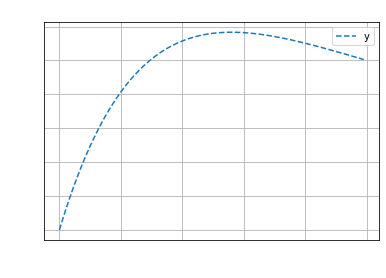

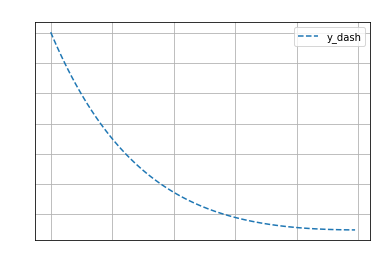

In [10]:
plt.plot(t[:-1],y[:-1],'--',label = 'y')
plt.grid()
plt.legend()
plt.xlabel('<-t->',color = 'white')
plt.ylabel('y(t)',color = 'white')
plt.title('y(t) estimated using shooting method',color = 'white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

plt.plot(t[:-1],y_dash[:-1],'--',label = 'y_dash')
plt.grid()
plt.legend()
plt.xlabel('<-t->',color = 'white')
plt.ylabel('y_dash(t)',color = 'white')
plt.title('y_dash(t) estimated using shooting method',color = 'white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()